C:\Users\abc\AppData\Local\Temp\ipykernel_4616\4251933266.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  synthetic_data_filtered[column] = le.fit_transform(synthetic_data_filtered[column])
C:\Users\abc\AppData\Local\Temp\ipykernel_4616\4251933266.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  synthetic_data_filtered[column] = le.fit_transform(synthetic_data_filtered[column])
C:\Users\abc\AppData\Local\Temp\ipykernel_4616\4251933266.py:29: SettingWithCopyWarning: 
A value is trying to be set on a

              precision    recall  f1-score   support

      normal       0.86      0.97      0.91       178
      attack       0.94      0.78      0.85       122

    accuracy                           0.89       300
   macro avg       0.90      0.87      0.88       300
weighted avg       0.90      0.89      0.89       300



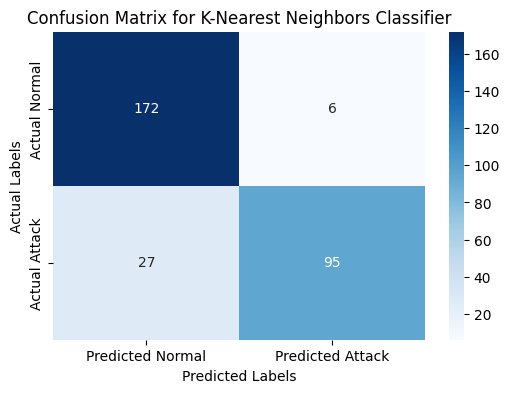

['../pipeline/deploy/classical-ai/knn_scaler.pkl']

In [3]:
# importing libraries - KNN

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load the synthetic dataset
synthetic_data_path = '../data/synthetic_data/synthetic_data_generation_llm.csv'
synthetic_data = pd.read_csv(synthetic_data_path)

# Step 1: Feature Engineering (extract relevant features from synthetic data)
features = ['src_bytes', 'dst_bytes', 'count', 'serror_rate', 'protocol', 'service']
synthetic_data_filtered = synthetic_data[features + ['label']]

# Step 2: Preprocessing (Label encode categorical features and normalize numerical features)
label_encoders = {}
for column in ['protocol', 'service']:
    le = LabelEncoder()
    synthetic_data_filtered[column] = le.fit_transform(synthetic_data_filtered[column])
    label_encoders[column] = le

scaler = StandardScaler()
synthetic_data_filtered[['src_bytes', 'dst_bytes', 'count', 'serror_rate']] = scaler.fit_transform(
    synthetic_data_filtered[['src_bytes', 'dst_bytes', 'count', 'serror_rate']]
)

# Step 3: Split data for training and evaluation
X = synthetic_data_filtered.drop(columns=['label'])
y = synthetic_data_filtered['label']
y_binary = np.where(y == 'normal', 0, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Step 4: Train the K-Nearest Neighbors (KNN) classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust 'n_neighbors' based on your problem
knn_classifier.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = knn_classifier.predict(X_test)
classification_report_knn = classification_report(y_test, y_pred, target_names=['normal', 'attack'])

print(classification_report_knn)

# Step 6: Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Normal', 'Predicted Attack'], yticklabels=['Actual Normal', 'Actual Attack'])
plt.title("Confusion Matrix for K-Nearest Neighbors Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()


# Save the trained model to disk
joblib.dump(knn_classifier, '../pipeline/deploy/classical-ai/knn_classifier_model.pkl')


# Save the label encoders and scaler for preprocessing in the API
joblib.dump(label_encoders, '../pipeline/deploy/classical-ai/knn_label_encoders.pkl')
joblib.dump(scaler, '../pipeline/deploy/classical-ai/knn_scaler.pkl')
 
